// timescale<time_unit>/<time_precision>

đơn vị thời gian / độ chia nhỏ nhất của thời gian (thời gian hệ thống có thể làm tròn)

# overview AES encryption
## Đặc điểm 
Mã hóa khối (128 bit dữ liệu) đối xứng.

Length key: 128, 192, 256

Vòng lặp chính:
1. KeyExpantion()
2. Subbytes()
3. ShiftRow()
4. MixColumn()
5. Addroundkey()

Mô hình thuật toán: 128bit -> Nr= 10, 192bit -> Nr= 12, 256bit -> Nr= 14

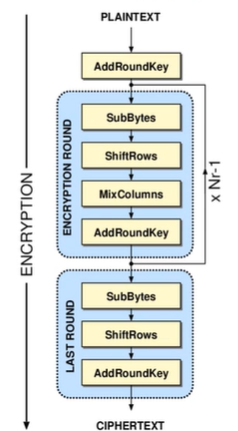

Mở rộng khóa, sau đó sinh khóa cho từng vòng:

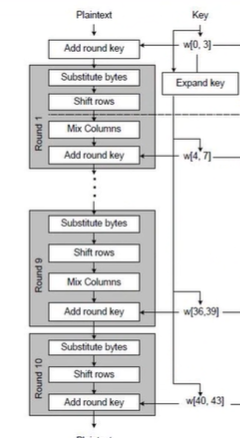





# Subbytes()
    thực hiện phép thay thế của mảng trạng thái bằng bảng S-box
    S-box có sẵn, tra theo từng số hexa chiếu theo trục x, y của bảng S-box
    phân thành từng khối 8bit
    8bit -> 8bit
    
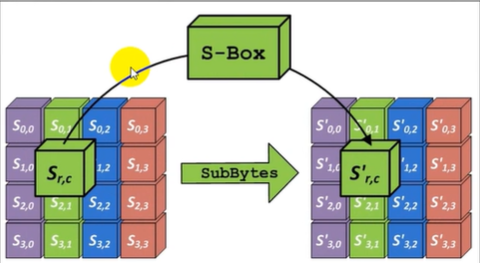

# ShiftRows()
    Làm việc theo hàng, dịch vòng ba hàng cuối của mảng trạng thái với số lần dịch(số byte dịch) khác nhau.
    theo thứ tự:
    Hàng 1 -> không dịch
    Hàng 2 -> dịch 1 byte
    Hàng 3 -> dịch 2 byte
    Hàng 4 -> dịch 3 byte
    
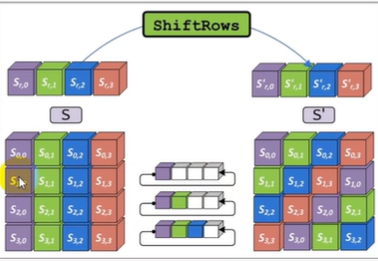

# MixColumns()
    Làm việc theo cột, các cột coi như đa thức trong GF(28) 
    nhân với đa thức a(x) = 3x^3 + x^2 + x + 2
    
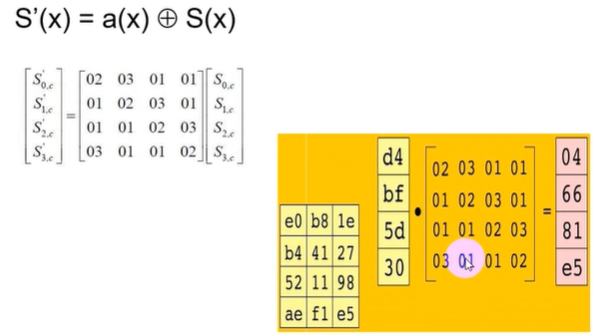

# AddRoundKey()
    chèn khóa vòng, Mảng trạng thái hiện tại được XOR với khóa sinh ra tại mỗi vòng

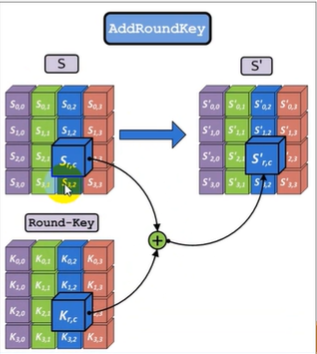


# KeyExpantion
    Mở rộng khóa, từ 1 khóa đầu mở rộng thành từng khóa sử dụng cho mỗi vòng.
    mỗi vòng có 4 bytes -> 32bit.
    gồm 4 bước:
-    Rotword: quay trái 8 bit
-    subbyte: tương tự Subbytes trong vòng chính, lấy từng byte thay bằng biến trong S-box
-    Rcon: tính giá trị Rcon(round),lấy cột đầu tiên xor với Rcon(round) của mỗi vòng với cột đầu tiên của mảng trạng thái của khóa trước đó. Từ cột thứ 2 trở đi, chỉ lấy cột liền kề trước xor với cùng vị trí cột đó với mảng trạng thái trước đó mà không xor với Rcon.

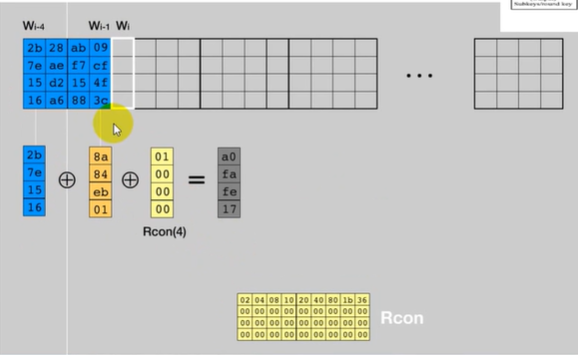

    

=> Ta được đầu ra là khóa con của vòng tiếp theo.

# NEW KNOWLEDGE

1. **timescale<time_unit>/<time_precision>**:
    - Đơn vị thời gian / độ chia nhỏ nhất của thời gian (thời gian hệ thống có thể làm tròn)
2. **function #(<arg1,..>) (<arg2,...>)**: 
    - argument là đối số
    - tương tự như truyền đối số của c++
    - <arg1,...>: là đối số cho parameter
    - <arg2,...>: là các đối số cho input, output.
3. khai báo lời gọi module trong file khác.
    - vd: Sbox (clk, reset, valid_in, data_in, data_out);
    - => Sbox Sbox_inst(
        .clk(clk), // clk trước là của module Sbox, clk sau là của file tb hoặc file cha.
        ...
    )
    - => SubBytes #(.DATA_LEN(DATA_LEN)) Sb(...) // sau dấu # là truyền parameter, tạu instance.